In [1]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


# 누락된 값 식별

In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# 누란된 값이 있는 샘플 또는 feature 제외

In [4]:
# 삭제
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# 모든 열이 NaN일 때만 행 삭제
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# 실수 값이 네 개보다 작은 행 삭제
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# 특정 열에 NaN이 있는 행만 삭제
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# Interpolation (보간); 누락된 값 대체

In [13]:
# 평균으로 대체
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# 범주형 데이터 다루기

### 순서가 있는 특성과 순서가 없는 특성
- 순서가 있는 특성은 정렬하거나 차례대로 놓을 수 있다. (옷 사이즈)
- 순서가 없는 특성은 차례를 부여할 수 없다. (옷 색상)

In [31]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
size_mapping = {'XL':3, 'L':2, 'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [33]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### class label encoding

In [34]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [35]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [36]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [37]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [38]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

## 범주형 데이터인 열들을 한번에 encoding 하기 with 열 마다 다른 변환

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

# One-hot encoding

In [42]:
pd.get_dummies(df, columns =['price', 'color', 'size'], drop_first = True)

,classlabel,price_13.5,price_15.3,color_green,color_red,size_2,size_3
0,0,0,0,1,0,0,0
1,1,1,0,0,1,1,0
2,0,0,1,0,0,0,1


# split dataset to train & test

In [46]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   '0D280/0D315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# 특성 스케일 맞추기

- 두 개의 특성을 비교했을 때, 1번은 1 ~ 10, 2번이 1 ~ 10만이면 knn 또는 퍼셉트론 등 확률분포를 사용한 알고리즘은 스케일이 큰 특성에 오차를 맞추어 가중치를 최적화한다.

### 정규화 (normalization)
- 정규화 -> 스케일을 [0, 1] 범위에 맞추는 것 (min-max scaling)
- $x_{norm}^{i} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}$
- min-max scaler를 통한 정규화는 범위가 정해진 값이 필요할 때 사용

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 표준화 (standardization)
- 최적화 알고리즘에 널리 사용
- 특성의 평균을 0, 표준편차를 1로 하여 정규분포와 같은 특성을 가지도록 함 -> 가중치 학습을 간편하게 한다.
- 이상치 정보가 유지되기 때문에 min-max scaler에 비해 이상치에 덜 민감하다 (min-max scaler는 이상치가 있을 경우, 다른 샘플은 좁은 구간에 촘촘하게 위치한다.)
- $x_{std}^{i} = \frac{x^{(i)} - \mu_{x}}{\sigma_{x}}$

In [49]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('표준화: ', (ex - ex.mean())/ ex.std())
print('정규화: ', (ex-ex.min()) / (ex.max() - ex.min()))

표준화:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화:  [0.  0.2 0.4 0.6 0.8 1. ]


In [51]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 유용한 특성 선택
규제
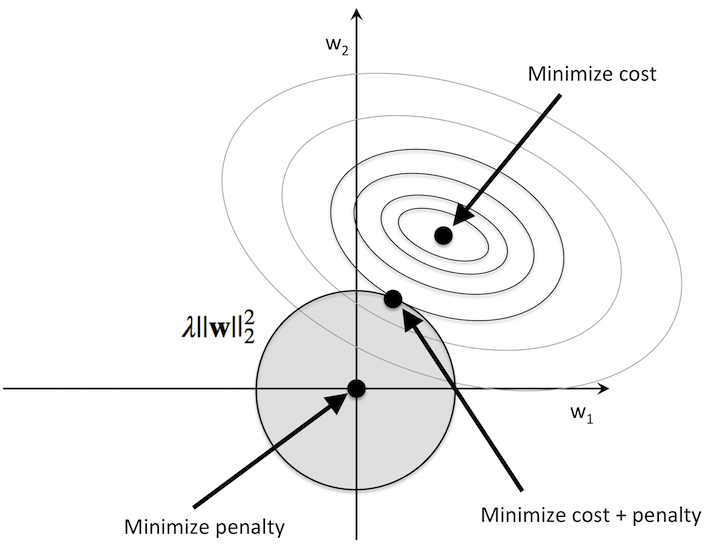

In [52]:
# hyper-parameter 'penalty = l1'
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty = 'l1', C=1.0, random_state = 42)
lr.fit(X_train_std, y_train)
print('훈련 정확도: ', lr.score(X_train_std, y_train))

print('테스트 정확도: ', lr.score(X_test_std, y_test))

훈련 정확도:  1.0
테스트 정확도:  1.0


In [53]:
lr.intercept_

array([-1.26337062, -1.21589856, -2.37123021])

In [54]:
lr.coef_

array([[ 1.24576659,  0.18058767,  0.74350018, -1.16124724,  0.        ,
         0.        ,  1.16980876,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54766459,  2.51035195],
       [-1.53733962, -0.38708383, -0.99527244,  0.36471957, -0.05950713,
         0.        ,  0.66789801,  0.        ,  0.        , -1.93398986,
         1.2340047 ,  0.        , -2.23193492],
       [ 0.13548833,  0.16993776,  0.35772851,  0.        ,  0.        ,
         0.        , -2.43321771,  0.        ,  0.        ,  1.56140709,
        -0.81736863, -0.49774774,  0.        ]])

### 규제 강도에 따른 특성의 가중치 변화 그래프

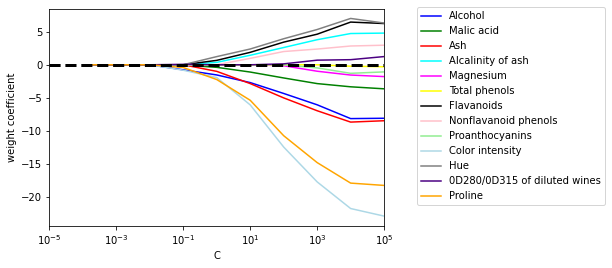

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
          'black', 'pink', 'lightgreen', 'lightblue', 'gray',
          'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto',
                            penalty = 'l1', C=10.**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label = df_wine.columns[column + 1],
             color = color)
    
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor = (1.38, 1.03),
          ncol=1, fancybox = True)
plt.show()

### 순차 특성 선택 알고리즘
- 차원 축소 (dimensioinality reduction)에는 feature selection, feature extraction이 있다.
- 순차 특성 선택 알고리즘은 초기 d 차원의 특성 공간을 k < d 인 k 차원의 특성 부분 공간으로 축소
- 규제를 제공하지 않는 알고리즘을 사용할 때 유용하다.

- 순차 후진 선택 (sequential backward selection, SBS)
- 계산 효율성 향상하기 위해 모델 성능을 가능한 적게 희생하면서 초기 특성의 부분 공간으로 차원을 축소
- SBS는 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성을 제거
- 각 단계에서 특성을 제거했을 때 성능 손실이 최대가 되는 특성 제거

1) 알고리즘을 k = d로 초기화 (d는 전체 차원)

2) 조건 $x^{-} = argmax \: J(X_{k}- x)$를 최대화 하는 특성 x를 결정

3) 특성 x 제거 -> k-1

4) 2, 3번을 반복하며 k가 목표하는 특성 개수가 되면 종료

#### SBS

In [61]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size=0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size,
                                                            random_state = self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [62]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

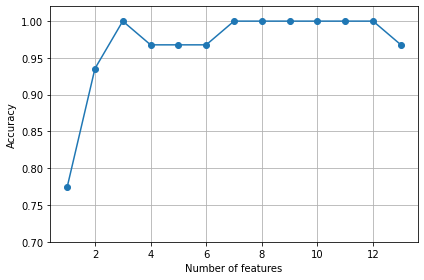

In [63]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [64]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', '0D280/0D315 of diluted wines'], dtype='object')


### original dataset

In [65]:
knn.fit(X_train_std, y_train)
print('train: ', knn.score(X_train_std, y_train))
print('test: ', knn.score(X_test_std, y_test))

train:  0.967741935483871
test:  0.9629629629629629


### k3

In [66]:
knn.fit(X_train_std[:, k3], y_train)
print('train: ', knn.score(X_train_std[:, k3], y_train))
print('test: ', knn.score(X_test_std[:, k3], y_test))

train:  0.9516129032258065
test:  0.9259259259259259


# randomforest feature selection

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


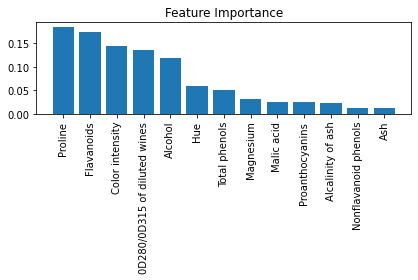

In [67]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align = 'center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# SelectFromModel

In [68]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수: ', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수:  5


In [69]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
